In [2]:
import pandas as pd
import scanpy as sc
import triku as tk
import numpy as np

In [3]:
np.random.seed(42) 

In [4]:
#importing datasets
data= pd.read_csv('dataset.csv', index_col=0)
metadata = pd.read_csv('labels.csv', index_col=0)

In [5]:
data['sample'] = metadata['Class']


In [6]:
numeric_data = data.drop(columns=['sample']) 

In [7]:
# Extracting numeric expression data (excluding non-numeric columns)
numeric_data = data.drop(columns=['sample'])  


In [8]:
# Creating AnnData object
adata = sc.AnnData(numeric_data)

In [9]:
adata.obs = metadata

In [10]:
# Normalization and log transformation
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [11]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=50)

In [12]:
# Initial PCA and neighbors calculation
sc.pp.pca(adata)


In [13]:
# Setting the value of n_neighbors
n_neighbors = 200

In [14]:
# Computing the neighborhood graph
sc.pp.neighbors(adata, metric='cosine', n_neighbors=n_neighbors)

In [15]:
# Running Triku 
tk.tl.triku(adata)

WARNING | 2024-07-22 12:10:40,171 - triku.logg - X is dense. We will set the matrix to sparse format (csr_matrix).



In [16]:
# Second PCA and neighbors calculation
sc.pp.pca(adata)
sc.pp.neighbors(adata, metric='cosine', n_neighbors=n_neighbors)

In [17]:
# Filtering the highly variable genes
hvg = adata.var[adata.var['highly_variable']]
hvg_genes = hvg.index.tolist()

In [49]:
# Creating a new AnnData object with selected highly variable genes
adata_hvg= adata[:, hvg_genes]

In [20]:
print (hvg)

            n_cells  highly_variable  triku_distance  \
gene_18         487             True        3.819948   
gene_30         365             True        4.013829   
gene_38         801             True        3.245016   
gene_39         459             True        3.148987   
gene_43         155             True        3.632535   
...             ...              ...             ...   
gene_16324      801             True        3.501753   
gene_16327      801             True        4.223967   
gene_16337      676             True        2.915377   
gene_16365      801             True        3.074563   
gene_16368      801             True        5.736302   

            triku_distance_uncorrected  triku_highly_variable  
gene_18                       8.338709                   True  
gene_30                       8.514713                   True  
gene_38                      13.723686                   True  
gene_39                       7.364302                   True  
gene_43

In [21]:
# Computing UMAP
sc.tl.umap(adata)

In [22]:
# Clustering the data using the Leiden algorithm
sc.tl.leiden(adata)

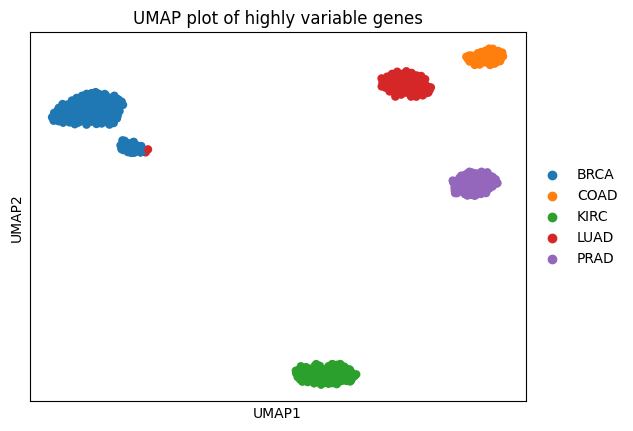

In [63]:
# Visualizing UMAP with Leiden clusters and cell type labels
sc.pl.umap(adata, color=['Class'], title='UMAP plot of highly variable genes')

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
# Getting the UMAP embedding
umap_embedding = adata_hvg.obsm['X_umap']

In [26]:
# Getting the cell type labels
labels = adata.obs['Class']

In [56]:
# Calculating the silhouette score
silhouette_avg = silhouette_score(umap_embedding, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.8492949604988098


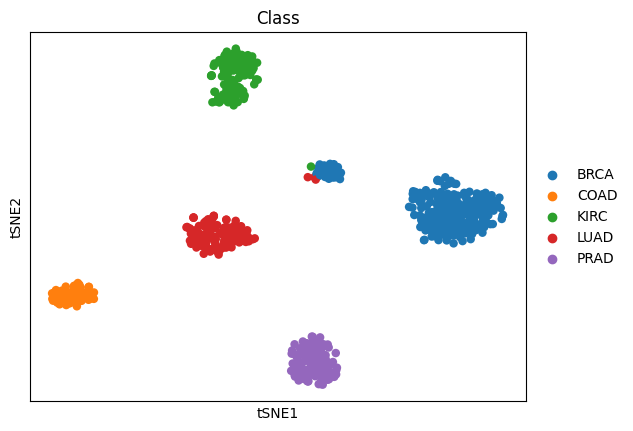

In [57]:
#  t-SNE
sc.tl.tsne(adata_hvg)
sc.pl.tsne(adata_hvg, color='Class')

In [29]:
# Total number of highly variable genes
total_genes = len(hvg)

In [30]:
print (total_genes )

1430


In [32]:
# Extracting the highly variable genes
hvg = adata.var[adata.var['highly_variable']]
hvg_genes = hvg.index.tolist()

In [35]:
# Creating a DataFrame
hvg_df = pd.DataFrame({
    'Gene': hvg_genes,
    'triku_distance': hvg['triku_distance'] 
})


In [36]:
# Saving the table to a CSV file
hvg_df.to_csv('highly_variable_genes.csv', index=False)

In [37]:
import pandas as pd
import os


In [38]:
# Print the current working directory
print("Current Working Directory:", os.getcwd())


Current Working Directory: C:\Users\meleesha wijekoon\Desktop\python


In [51]:
# Extracting highly variable genes
hvg = adata.var[adata.var['highly_variable']]
hvg_genes = hvg.index.tolist()
variability_scores = hvg['triku_distance']  # Replace with actual column name

In [52]:
# Creating a DataFrame
hvg_df = pd.DataFrame({
    'Gene': hvg_genes,
    'Variability Score': variability_scores
})


In [53]:
# Sorting DataFrame by variability score for better readability
hvg_df = hvg_df.sort_values(by='Variability Score', ascending=False)

In [55]:
# Saving the table to a CSV file
hvg_df.to_csv('highly_variable__genes.csv', index=False)


In [58]:
from sklearn.metrics import normalized_mutual_info_score

In [60]:
# Extracting the cluster labels and the true labels
cluster_labels = adata.obs['leiden']
true_labels = adata.obs['Class']

In [61]:
# Calculating NMI
nmi_score = normalized_mutual_info_score(true_labels, cluster_labels)
print(f'Normalized Mutual Information (NMI) Score: {nmi_score}')

Normalized Mutual Information (NMI) Score: 0.9409995023886164
